In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/coursewoork/bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows before : {duplicate_count}")

Total duplicate rows before : 12


In [8]:
#drop the duplicates
df_cleaned = df.drop_duplicates()
print(f"Duplicate rows after: {df_cleaned.duplicated().sum()}")

Duplicate rows after: 0


In [ ]:
#checking the null values
print(f"missing values per column: \n{df.isnull().sum()}")

missing values per column: 
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
# summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#Encoding and Standardizing the Dataset

1. Frequency Encoding the Job column

Note: Treating unknown values as their own distinct category called missing

In [ ]:
# Step 1: Map 'unknown' to 'missing'
df['job'] = df['job'].replace('unknown', 'missing')

# Step 2: Calculate the frequency of each unique value in the 'job' column
job_frequency = df['job'].value_counts() / len(df)  # Frequency of each unique value

# Step 3: Map the frequency to the 'job' column
df['job'] = df['job'].map(job_frequency)  # Replace 'job' with its corresponding frequency

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025736,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.096363,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.096363,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.253035,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.096363,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


2. Filling unkown values in Marital status column with the most frequent value

In [ ]:

# Step 1: Replace 'unknown' in the (marital) column with the most frequent value (mode)
most_frequent_marital = df['marital'].mode()[0]
df['marital'] = df['marital'].replace('unknown', most_frequent_marital)

# Step 2: One-hot encode the (marital) column
df = pd.get_dummies(df, columns=['marital'], drop_first=False)  # Keeping all categories

In [ ]:
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single
0,56,0.025736,basic.4y,no,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
1,57,0.096363,high.school,unknown,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
2,37,0.096363,high.school,no,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
3,40,0.253035,basic.6y,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
4,56,0.096363,high.school,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False


3. Frequency encoding education column

In [ ]:

# Step 1: Calculate the frequency of each unique value in the education column
education_frequency = df['education'].value_counts() / len(df)

# Step 2: Map the frequency to the education column [Replace (education) with its corresponding frequency]
df['education'] = df['education'].map(education_frequency)

In [ ]:
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single
0,56,0.025736,0.101389,no,no,no,telephone,may,mon,261,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
1,57,0.096363,0.231014,unknown,no,no,telephone,may,mon,149,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
2,37,0.096363,0.231014,no,yes,no,telephone,may,mon,226,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
3,40,0.253035,0.055647,no,no,no,telephone,may,mon,151,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False
4,56,0.096363,0.231014,no,no,yes,telephone,may,mon,307,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,True,False


4. One hot encoding the default column while treating unkown values (converted to missing) as a seperate category

In [ ]:
# Step 1: Replace 'unknown' in the (default) column with a distinct category (missing)
df['default'] = df['default'].replace('unknown', 'missing')

# Step 2: One-hot encode the (default)  column
df = pd.get_dummies(df, columns=['default'], drop_first=False)

In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,no,no,telephone,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,no,no,telephone,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,yes,no,telephone,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,no,no,telephone,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,no,yes,telephone,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


 impute the unkown values and label encode the housing column
 unkown values = 2% of datase (so imputing with frequent value)

In [ ]:


# Step 1: Impute the 'unknown' values in the (housing) column with the most frequent value (mode)
most_frequent_housing = df['housing'].mode()[0]
df['housing'] = df['housing'].replace('unknown', most_frequent_housing)

# Step 2: Label encode the (housing) column
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})


In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,0,no,telephone,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,0,no,telephone,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,1,no,telephone,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,0,no,telephone,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,0,yes,telephone,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


impute the unkown values and label encode the loan column unkown values = 2% of datase (so imputing with frequent value)

In [ ]:


# Step 1: Impute the 'unknown' values in the (housing) column with the most frequent value (mode)
most_frequent_housing = df['loan'].mode()[0]
df['loan'] = df['loan'].replace('unknown', most_frequent_housing)

# Step 2: Label encode the (housing) column
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})


In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,0,0,telephone,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,0,0,telephone,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,1,0,telephone,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,0,0,telephone,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,0,1,telephone,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


label encode contact column (only 2 unique values)

In [ ]:
# Step 1: Label encode the (contact) column
df['contact'] = df['contact'].map({'telephone': 0, 'cellular': 1})


In [ ]:
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,default_missing,default_no,default_yes
0,56,0.025736,0.101389,0,0,0,may,mon,261,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
1,57,0.096363,0.231014,0,0,0,may,mon,149,1,...,-36.4,4.857,5191.0,no,False,True,False,True,False,False
2,37,0.096363,0.231014,1,0,0,may,mon,226,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
3,40,0.253035,0.055647,0,0,0,may,mon,151,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False
4,56,0.096363,0.231014,0,1,0,may,mon,307,1,...,-36.4,4.857,5191.0,no,False,True,False,False,True,False


In [ ]:
#one hot encoding month column
df = pd.get_dummies(df, columns=['month'], drop_first=False)


In [ ]:
df.head()

,age,job,education,housing,loan,contact,day_of_week,duration,campaign,pdays,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0.025736,0.101389,0,0,0,mon,261,1,999,...,False,False,False,False,False,False,True,False,False,False
1,57,0.096363,0.231014,0,0,0,mon,149,1,999,...,False,False,False,False,False,False,True,False,False,False
2,37,0.096363,0.231014,1,0,0,mon,226,1,999,...,False,False,False,False,False,False,True,False,False,False
3,40,0.253035,0.055647,0,0,0,mon,151,1,999,...,False,False,False,False,False,False,True,False,False,False
4,56,0.096363,0.231014,0,1,0,mon,307,1,999,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
#onehot encoding day of week column
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=False)


In [ ]:
df.head()

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0.025736,0.101389,0,0,0,261,1,999,0,...,False,True,False,False,False,False,True,False,False,False
1,57,0.096363,0.231014,0,0,0,149,1,999,0,...,False,True,False,False,False,False,True,False,False,False
2,37,0.096363,0.231014,1,0,0,226,1,999,0,...,False,True,False,False,False,False,True,False,False,False
3,40,0.253035,0.055647,0,0,0,151,1,999,0,...,False,True,False,False,False,False,True,False,False,False
4,56,0.096363,0.231014,0,1,0,307,1,999,0,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
#one hot encoding poutcome column
df = pd.get_dummies(df, columns=['poutcome'], drop_first=False)


In [ ]:
df.head()

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.025736,0.101389,0,0,0,261,1,999,0,...,False,False,False,True,False,False,False,False,True,False
1,57,0.096363,0.231014,0,0,0,149,1,999,0,...,False,False,False,True,False,False,False,False,True,False
2,37,0.096363,0.231014,1,0,0,226,1,999,0,...,False,False,False,True,False,False,False,False,True,False
3,40,0.253035,0.055647,0,0,0,151,1,999,0,...,False,False,False,True,False,False,False,False,True,False
4,56,0.096363,0.231014,0,1,0,307,1,999,0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#label encoding y column
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job                   41188 non-null  float64
 2   education             41188 non-null  float64
 3   housing               41188 non-null  int64  
 4   loan                  41188 non-null  int64  
 5   contact               41188 non-null  int64  
 6   duration              41188 non-null  int64  
 7   campaign              41188 non-null  int64  
 8   pdays                 41188 non-null  int64  
 9   previous              41188 non-null  int64  
 10  emp.var.rate          41188 non-null  float64
 11  cons.price.idx        41188 non-null  float64
 12  cons.conf.idx         41188 non-null  float64
 13  euribor3m             41188 non-null  float64
 14  nr.employed           41188 non-null  float64
 15  y                  

standarize the age, duration , pdays, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m

In [ ]:

# Columns to standardize
columns_to_standardize = ['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']

# Initialize and apply the standardization
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize].head())


        age  duration     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  1.533034  0.010471  0.195414      0.648092        0.722722       0.886447   
1  1.628993 -0.421501  0.195414      0.648092        0.722722       0.886447   
2 -0.290186 -0.124520  0.195414      0.648092        0.722722       0.886447   
3 -0.002309 -0.413787  0.195414      0.648092        0.722722       0.886447   
4  1.533034  0.187888  0.195414      0.648092        0.722722       0.886447   

   euribor3m  nr.employed  
0    0.71246      0.33168  
1    0.71246      0.33168  
2    0.71246      0.33168  
3    0.71246      0.33168  
4    0.71246      0.33168  


In [ ]:
df.head(10)

,age,job,education,housing,loan,contact,duration,campaign,pdays,previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,0.025736,0.101389,0,0,0,0.010471,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
1,1.628993,0.096363,0.231014,0,0,0,-0.421501,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
2,-0.290186,0.096363,0.231014,1,0,0,-0.124520,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
3,-0.002309,0.253035,0.055647,0,0,0,-0.413787,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
4,1.533034,0.096363,0.231014,0,1,0,0.187888,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
5,0.477486,0.096363,0.146766,0,0,0,-0.232513,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
6,1.820911,0.253035,0.127294,0,0,0,-0.460069,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
7,0.093650,0.224677,0.042027,0,0,0,-0.159232,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
8,-1.537652,0.163713,0.127294,1,0,0,0.469442,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False
9,-1.441693,0.096363,0.231014,1,0,0,-0.803333,1,0.195414,0,...,False,False,False,True,False,False,False,False,True,False


Save the cleaned Dataset


In [ ]:
cleaned_file_path = "/content/drive/MyDrive/coursewoork/cleaned_data.csv"
df.to_csv(cleaned_file_path, index=False)

#Data Visualization

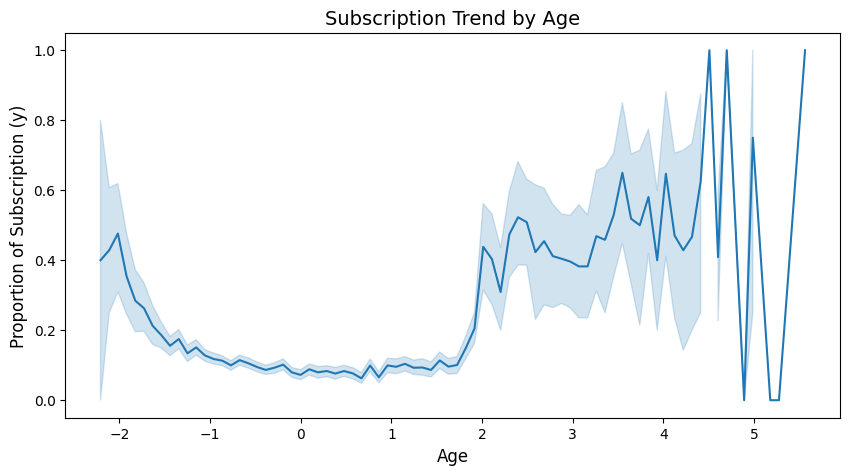

In [ ]:
#line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["age"], y=df["y"])

# Labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Proportion of Subscription (y)", fontsize=12)
plt.title("Subscription Trend by Age", fontsize=14)
plt.show()

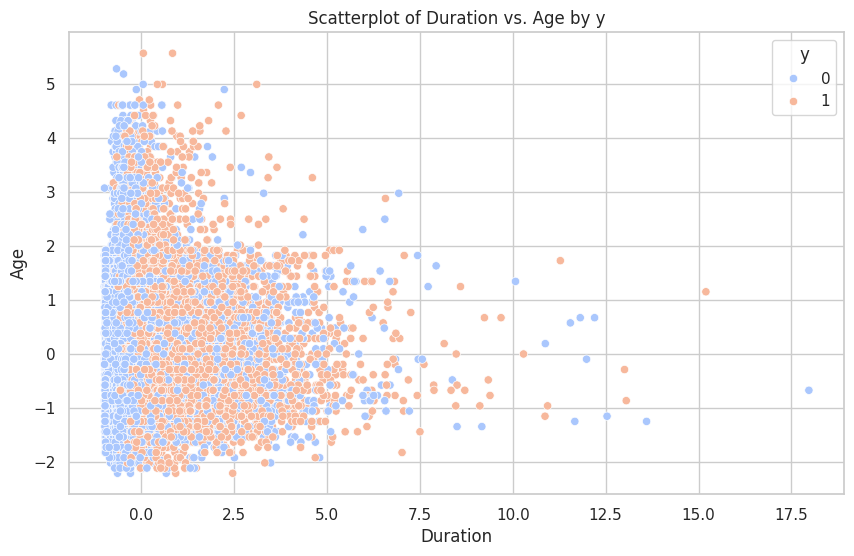

In [ ]:
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='age', hue='y', palette='coolwarm', marker='o')
plt.title('Scatterplot of Duration vs. Age by y')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.show()

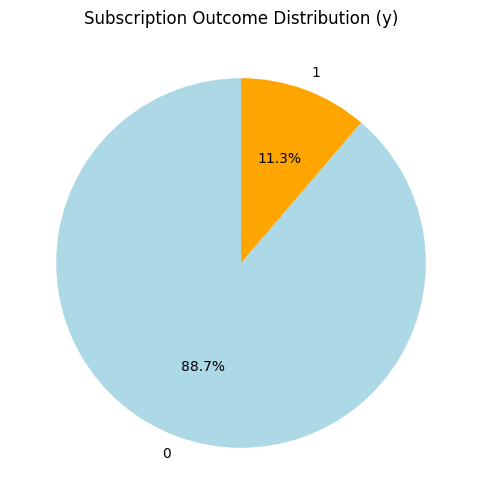

In [ ]:

# Count the occurrences of each category in the target column 'y'
y_counts = df['y'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title("Subscription Outcome Distribution (y)")
plt.show()


# Buld a model from scratch

In [ ]:
#load the cleaned file
df_cleaned = pd.read_csv('/content/drive/MyDrive/coursewoork/cleaned_data.csv')

In [11]:

# Convert boolean columns to integers
df_cleaned = df_cleaned.applymap(lambda x: int(x) if isinstance(x, bool) else x)

X = df_cleaned.drop('y', axis=1).values
y = df_cleaned['y'].values

#train and test and split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

<ipython-input-11-183e1bce3836>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: int(x) if isinstance(x, bool) else x)


((32940, 20), (8236, 20), (32940,), (8236,))

In [ ]:
# Logistic Regression Model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, verbose=True):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.verbose = verbose

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(1, self.iterations + 1):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self.verbose and i % 100 == 0:
                loss = self.compute_loss(y, y_predicted)
                print(f"Iteration {i}/{self.iterations} - Loss: {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted > 0.5, 1, 0)

    def predict_single(self, x_single):
        x_single = np.array(x_single).reshape(1, -1)
        logits = np.dot(x_single, self.weights) + self.bias
        probs = self.sigmoid(logits)
        return np.argmax(probs), probs.flatten()

In [ ]:
# Training the model
model = LogisticRegression(learning_rate=0.02, iterations=10000)
model.fit(X_train, y_train)

# Predictions and accuracy
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test) * 100

print(f"Final Accuracy: {accuracy:.2f}%")


Iteration 100/10000 - Loss: 0.2378
Iteration 200/10000 - Loss: 0.2116
Iteration 300/10000 - Loss: 0.1977
Iteration 400/10000 - Loss: 0.1885
Iteration 500/10000 - Loss: 0.1819
Iteration 600/10000 - Loss: 0.1771
Iteration 700/10000 - Loss: 0.1734
Iteration 800/10000 - Loss: 0.1705
Iteration 900/10000 - Loss: 0.1682
Iteration 1000/10000 - Loss: 0.1664
Iteration 1100/10000 - Loss: 0.1648
Iteration 1200/10000 - Loss: 0.1635
Iteration 1300/10000 - Loss: 0.1624
Iteration 1400/10000 - Loss: 0.1614
Iteration 1500/10000 - Loss: 0.1606
Iteration 1600/10000 - Loss: 0.1599
Iteration 1700/10000 - Loss: 0.1593
Iteration 1800/10000 - Loss: 0.1587
Iteration 1900/10000 - Loss: 0.1582
Iteration 2000/10000 - Loss: 0.1578
Iteration 2100/10000 - Loss: 0.1574
Iteration 2200/10000 - Loss: 0.1570
Iteration 2300/10000 - Loss: 0.1567
Iteration 2400/10000 - Loss: 0.1564
Iteration 2500/10000 - Loss: 0.1561
Iteration 2600/10000 - Loss: 0.1559
Iteration 2700/10000 - Loss: 0.1556
Iteration 2800/10000 - Loss: 0.1554
I

# Build primary model for the classification

# KNN Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


Accuracy: 72.93%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83      5698
         1.0       0.68      0.23      0.34      2540

    accuracy                           0.73      8238
   macro avg       0.71      0.59      0.59      8238
weighted avg       0.72      0.73      0.68      8238



## Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


Accuracy: 71.21%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.98      0.82      5698
         1.0       0.71      0.11      0.19      2540

    accuracy                           0.71      8238
   macro avg       0.71      0.55      0.51      8238
weighted avg       0.71      0.71      0.63      8238



# Hyper-parameter Optimization with Cross-Validation

For KNN

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import time
from sklearn.metrics import accuracy_score, classification_report

# Define the pipeline(feature Selection)
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'feature_selection__k': np.arange(5, 16), # Selecting between 5 and all features
    'knn__n_neighbors': np.arange(1, 31),                        # Number of neighbors from 1 to 30
    'knn__weights': ['uniform', 'distance'],                    # Weighting strategies
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']      # Distance metrics
}

# Start timing the search
start_time = time.time()

# RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=300,                  # Number of random combinations to try
    cv=2,                       # 2-fold cross-validation
    scoring='accuracy',         # Optimizing for accuracy
    random_state=42,
    n_jobs=-1                   # Utilize all processors
)

# Fit the model
random_search_knn.fit(X_train, y_train)

# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Display the best hyperparameters
print("\nBest Hyperparameters Found:")
best_params = random_search_knn.best_params_
for param, value in best_params.items():
    print(f"{param}: {value}")

# Display the best accuracy score
best_accuracy = random_search_knn.best_score_
print(f"\nBest Cross-Validation Accuracy: {best_accuracy:.4f}")

# Display total time taken
print(f"Total Time Taken: {elapsed_time:.2f} seconds")

# Evaluate on test data
best_model = random_search_knn.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Print test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Best Hyperparameters Found:
knn__weights: uniform
knn__n_neighbors: 16
knn__metric: manhattan
feature_selection__k: 6

Best Cross-Validation Accuracy: 0.7898
Total Time Taken: 622.03 seconds

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.71      0.98      0.82      5698
           1       0.69      0.10      0.18      2540

    accuracy                           0.71      8238
   macro avg       0.70      0.54      0.50      8238
weighted avg       0.70      0.71      0.62      8238

Test Accuracy: 0.7088


For Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import time
import joblib


#  (X_train, X_test, y_train, y_test are done already  previously)

# Random Forest Hyperparameter Grid
param_dist_rf = {
    'n_estimators': np.arange(50, 201, 50),        # 50 to 200 trees (reduces training time)
    'max_depth': np.arange(5, 31, 5),              # Tree depth from 5 to 30
    'min_samples_split': [2, 5, 10],               # Min samples to split
    'min_samples_leaf': [1, 2, 4],                 # Min samples per leaf
    'bootstrap': [True, False]                     # Use of bootstrap samples
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Timer starts for Hyperparameter Tuning
start_time = time.time()

# RandomizedSearchCV for Hyperparameter Tuning
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=50,                # # Number of random combinations to try
    cv=2,                     # 2-fold CV to reduce computation time
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,                # Utilize all CPU cores (Colab supports this)
    verbose=2
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Timer ends for Hyperparameter Tuning
end_time = time.time()

# Calculate elapsed time for Hyperparameter Tuning
elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"\nRandom Forest Hyperparameter Tuning completed in {minutes} minutes and {seconds} seconds.")


# Start Timer for Evaluation
start_eval_time = time.time()

# Best parameters from RandomizedSearchCV
best_rf_params = rf_random_search.best_params_
print("Best Parameters for Random Forest:", best_rf_params)

# Predict using the optimized model
y_pred_rf_optimized = rf_random_search.predict(X_test)

# Calculate Accuracy
rf_optimized_accuracy = accuracy_score(y_test, y_pred_rf_optimized)
rf_optimized_accuracy_percentage = rf_optimized_accuracy * 100

# End Timer for Evaluation
end_eval_time = time.time()

# Calculate elapsed time for evaluation
eval_time = end_eval_time - start_eval_time
eval_minutes = int(eval_time // 60)
eval_seconds = int(eval_time % 60)

# Print Accuracy
print(f"Optimized Random Forest Accuracy: {rf_optimized_accuracy:.4f}")
print(f"Optimized Random Forest Accuracy: {rf_optimized_accuracy_percentage:.2f}%")
print(f"Evaluation completed in {eval_minutes} minutes and {eval_seconds} seconds.")


Fitting 2 folds for each of 50 candidates, totalling 100 fits

Random Forest Hyperparameter Tuning completed in 3 minutes and 9 seconds.
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': False}
Optimized Random Forest Accuracy: 0.6925
Optimized Random Forest Accuracy: 69.25%
Evaluation completed in 0 minutes and 0 seconds.
